In [39]:
from desc.geometry import FourierRZToroidalSurface
from desc.equilibrium import Equilibrium
from desc.plotting import plot_section, plot_1d, plot_2d, plot_3d, plot_surfaces, plot_boundary
from desc.objectives import FixBoundaryR, FixBoundaryZ, FixIota, FixPressure, FixPsi, ForceBalance, ObjectiveFunction
from desc.optimize import Optimizer
import numpy as np
from matplotlib import pyplot as plt
from desc.profiles import PowerSeriesProfile
from desc.grid import LinearGrid

In [47]:
surf = FourierRZToroidalSurface(
    R_lmn=[10,1,0.3,-0.3,-0.3],
    modes_R=[[0,0],[1,0],[1,-1],[1,-1],[0,1]],
    Z_lmn=[0,-1,-0.3, 0.3,0.3],
    modes_Z=[[0,0],[-1,0],[-1,-1],[1,1],[0,-1]],
    NFP=1,
    sym=False
)
iota = PowerSeriesProfile(params=[0.33,0.05], modes=[0,2])
pressure = PowerSeriesProfile(params=[0,0], modes=[0,2])
eq = Equilibrium(
    L=5,
    M=3,
    N=5,
    sym=False,
    iota=iota,
    pressure=pressure,
    surface=surf,
)

In [48]:
constraints = (
    FixBoundaryR(eq),
    FixBoundaryZ(eq),
    FixIota(eq),
    FixPressure(eq),
    FixPsi(eq),
)
optimizer = Optimizer("lsq-exact")
objectives = ForceBalance(eq)
obj = ObjectiveFunction(objectives)

In [49]:
eq.solve(
    constraints=constraints,
    objective=obj,
    ftol=1e-6,
    xtol=1e-16,
    gtol=1e-16,
    maxiter=100
)

Building objective: force
Precomputing transforms
Compiling objective function and derivatives: ['force']
Number of parameters: 401
Number of objectives: 1848
Starting optimization
Using method: lsq-exact
Optimization terminated successfully.
`ftol` condition satisfied.
         Current function value: 5.330e-07
         Total delta_x: 3.479e-01
         Iterations: 51
         Function evaluations: 52
         Jacobian evaluations: 52
Start of solver
Total (sum of squares):  7.701e-03, 
Maximum absolute Force error:  1.185e+05 (N)
Minimum absolute Force error:  3.825e+00 (N)
Average absolute Force error:  1.583e+04 (N)
Maximum absolute Force error:  1.329e-02 (normalized)
Minimum absolute Force error:  4.290e-07 (normalized)
Average absolute Force error:  1.775e-03 (normalized)
End of solver
Total (sum of squares):  5.330e-07, 
Maximum absolute Force error:  2.357e+03 (N)
Minimum absolute Force error:  2.853e-02 (N)
Average absolute Force error:  1.250e+02 (N)
Maximum absolute Force e

(Equilibrium at 0x2d958fdd0 (L=5, M=3, N=5, NFP=1, sym=False, spectral_indexing=ansi),
     message: Optimization terminated successfully.
              `ftol` condition satisfied.
     success: True
         fun: [-8.188e-06 -3.893e-06 ...  2.038e-05 -2.882e-05]
           x: [-9.221e-03  1.221e-01 ... -5.694e-03  7.521e-04]
         nit: 51
        cost: 5.330306998032716e-07
           v: [ 1.000e+00  1.000e+00 ...  1.000e+00  1.000e+00]
  optimality: 1.5031378907202745e-08
        nfev: 52
        njev: 52
        allx: [Array([-2.285e-16, -4.682e-17, ...,  0.000e+00,  0.000e+00],      dtype=float64), Array([-6.240e-05,  6.577e-05, ...,  0.000e+00,  0.000e+00],      dtype=float64), Array([-5.684e-05, -3.595e-05, ...,  0.000e+00,  0.000e+00],      dtype=float64), Array([-2.051e-05,  1.263e-04, ...,  0.000e+00,  0.000e+00],      dtype=float64), Array([ 1.254e-05,  3.604e-05, ...,  0.000e+00,  0.000e+00],      dtype=float64), Array([ 1.560e-05, -1.134e-04, ...,  0.000e+00,  0.000e+00]

(<Figure size 1079.13x719.422 with 12 Axes>,
 array([<Axes: title={'center': '$|\\mathbf{J} \\times \\mathbf{B} - \\nabla p|$ / $\\langle |\\nabla |B|^{2}/(2\\mu_0)| \\rangle_{vol}$, $\\phi \\cdot N_{FP}/2\\pi = 0.000$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>,
        <Axes: title={'center': '$|\\mathbf{J} \\times \\mathbf{B} - \\nabla p|$ / $\\langle |\\nabla |B|^{2}/(2\\mu_0)| \\rangle_{vol}$, $\\phi \\cdot N_{FP}/2\\pi = 0.167$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>,
        <Axes: title={'center': '$|\\mathbf{J} \\times \\mathbf{B} - \\nabla p|$ / $\\langle |\\nabla |B|^{2}/(2\\mu_0)| \\rangle_{vol}$, $\\phi \\cdot N_{FP}/2\\pi = 0.333$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>,
        <Axes: title={'center': '$|\\mathbf{J} \\times \\mathbf{B} - \\nabla p|$ / $\\langle |\\nabla |B|^{2}/(2\\mu_0)| \\rangle_{vol}$, $\\phi \\cdot N_{FP}/2\\pi = 0.500$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>,
        <Ax

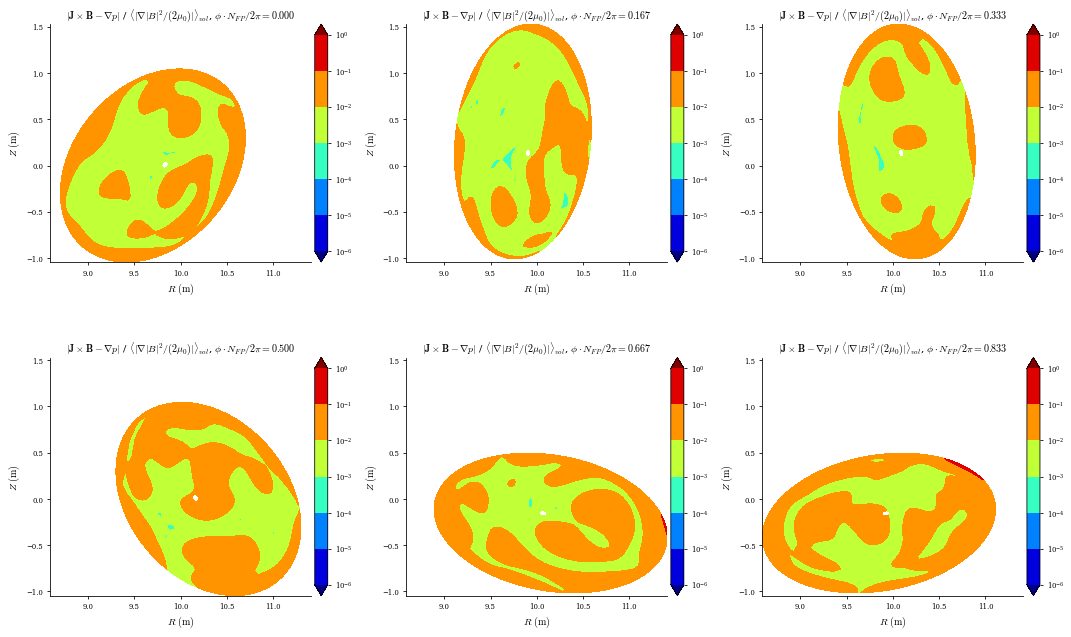

In [50]:
plot_section(eq, "|F|", norm_F=True, log=True)

(<Figure size 431.653x431.653 with 2 Axes>,
 <Axes3D: title={'center': '$|\\mathbf{B}|~(T)$'}, xlabel='$X ~(\\mathrm{m})$', ylabel='$Y ~(\\mathrm{m})$', zlabel='$Z ~(\\mathrm{m})$'>)

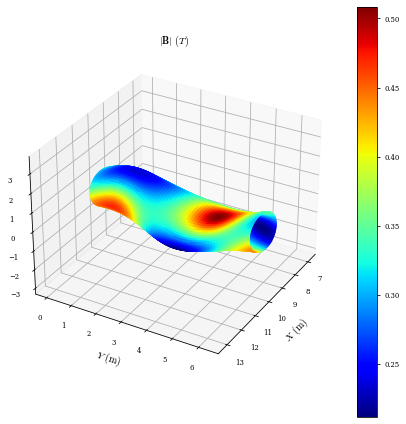

In [54]:
plot_3d(eq, "|B|", azim=30)

(<Figure size 863.306x719.422 with 6 Axes>,
 array([<Axes: title={'center': '$\\phi \\cdot N_{FP}/2\\pi = 0.000$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>,
        <Axes: title={'center': '$\\phi \\cdot N_{FP}/2\\pi = 0.167$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>,
        <Axes: title={'center': '$\\phi \\cdot N_{FP}/2\\pi = 0.333$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>,
        <Axes: title={'center': '$\\phi \\cdot N_{FP}/2\\pi = 0.500$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>,
        <Axes: title={'center': '$\\phi \\cdot N_{FP}/2\\pi = 0.667$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>,
        <Axes: title={'center': '$\\phi \\cdot N_{FP}/2\\pi = 0.833$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>],
       dtype=object))

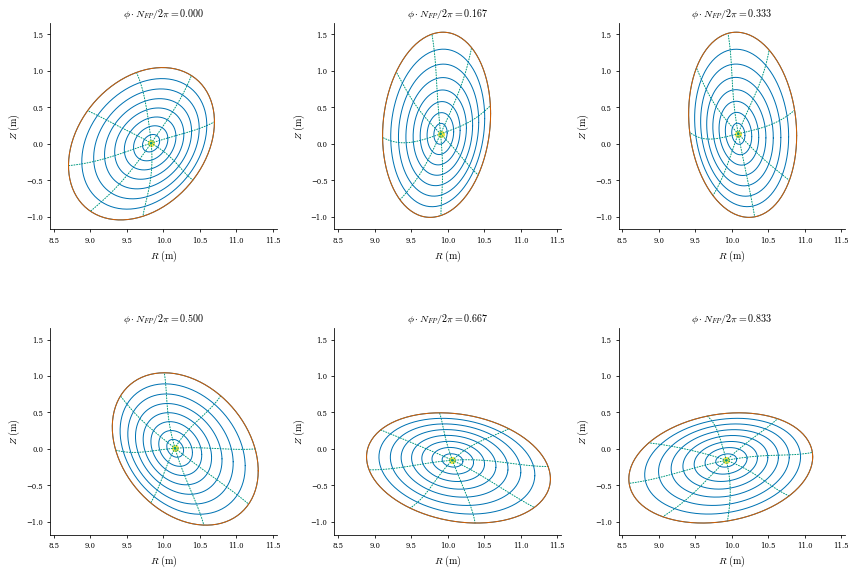

In [52]:
plot_surfaces(eq)